# Estudo Regressão Linear com Python

Este estudo foi desenvolvido por mim, Cleiber Garcia, por volta de Agosto de 2022, com base no material disponibilizado como parte do curso Python para Data Science e Machine Learning, ministrado por Rodrigo Soares Tadewald, 
    na Udemy: https://www.udemy.com/course/python-para-data-science-e-machine-learning/learn/lecture/8178882?start=0#overview
            
Para maiores informações, favor contactar-me em cleiber.garcia@gmail.com

## Importação das bibliotecas básicas

In [1]:
# importa as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Carga dos dados

In [2]:
# carrega a tabela USA_housing.csv
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
# exibe informações (tipos das variáveis e qtd de observações)
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
# exibe 5 observações (ocorrências) da tabela USAhousing
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
# principais medidas estatísticas
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## EDA - Visualização dos Dados

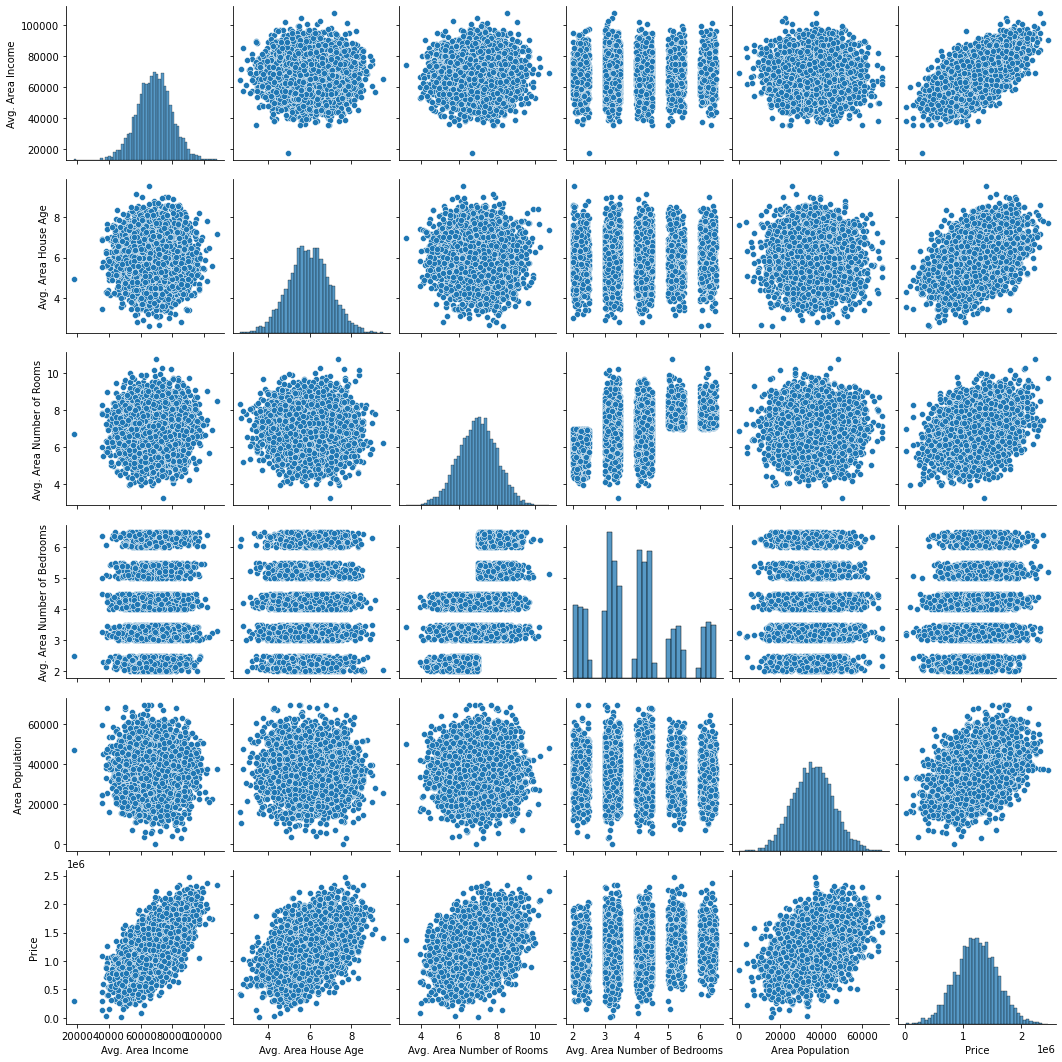

In [6]:
sns.pairplot(USAhousing)

<AxesSubplot:xlabel='Price', ylabel='Count'>

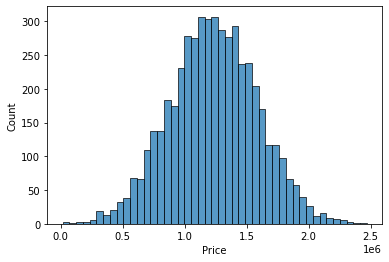

In [8]:
sns.histplot(USAhousing['Price'])

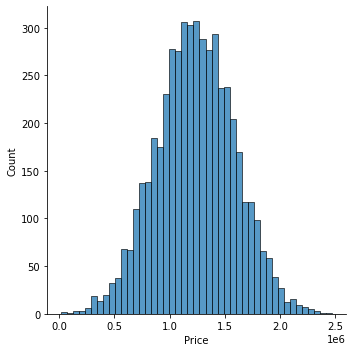

In [9]:
sns.displot(USAhousing['Price'])

<AxesSubplot:>

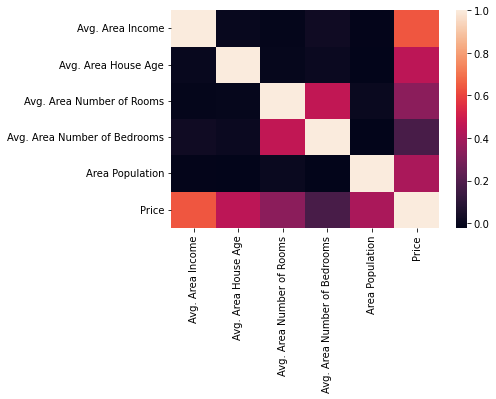

In [10]:
sns.heatmap(USAhousing.corr())

## Treinamento do Modelo de Regressão Linear

In [11]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Arrays X e y

In [12]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [13]:
y = USAhousing['Price']

In [14]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [15]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

## Divisão (split) dos dados em treino e teste

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Criando e treinando o modelo de Regressão Linear

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

In [21]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

## Exibe resultados do treino

In [23]:
print(lm.intercept_)

-2640159.7968526785


In [25]:
print(lm.coef_)

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [27]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

,Coefs
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## Predição 

### Previsão dos valores das casas, com base nos parâmetros encontrados para o modelo de Regressão Linear na fase de treino

In [28]:
predictions = lm.predict(X_test)

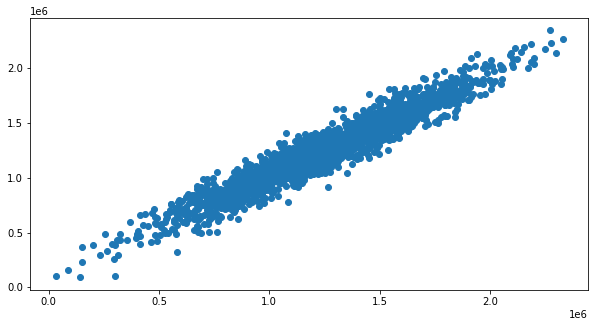

In [30]:
# exibe a correlação entre o preço das casas ("reais") e o preço calculado conforme o modelo
plt.figure(figsize=(10,5))
plt.scatter(y_test,predictions)

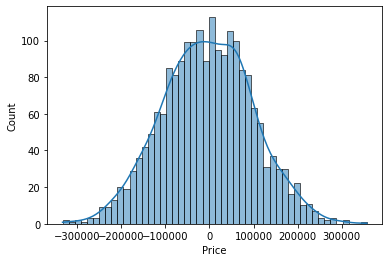

In [34]:
# Histograma dos erros (resíduos)
sns.histplot((y_test-predictions),bins=50, kde=True);

## Avaliação da Regressão (Métricas)

In [35]:
from sklearn import metrics

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914951
MSE: 10460958907.208992
RMSE: 102278.82922290904


************** Prática: modelo de regressão linear qualidade de vida (Global) - 2019

In [55]:
# importa as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
life_quality = pd.read_csv('2019.csv')

In [61]:
life_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [62]:
life_quality.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Análise exploratória dos dados

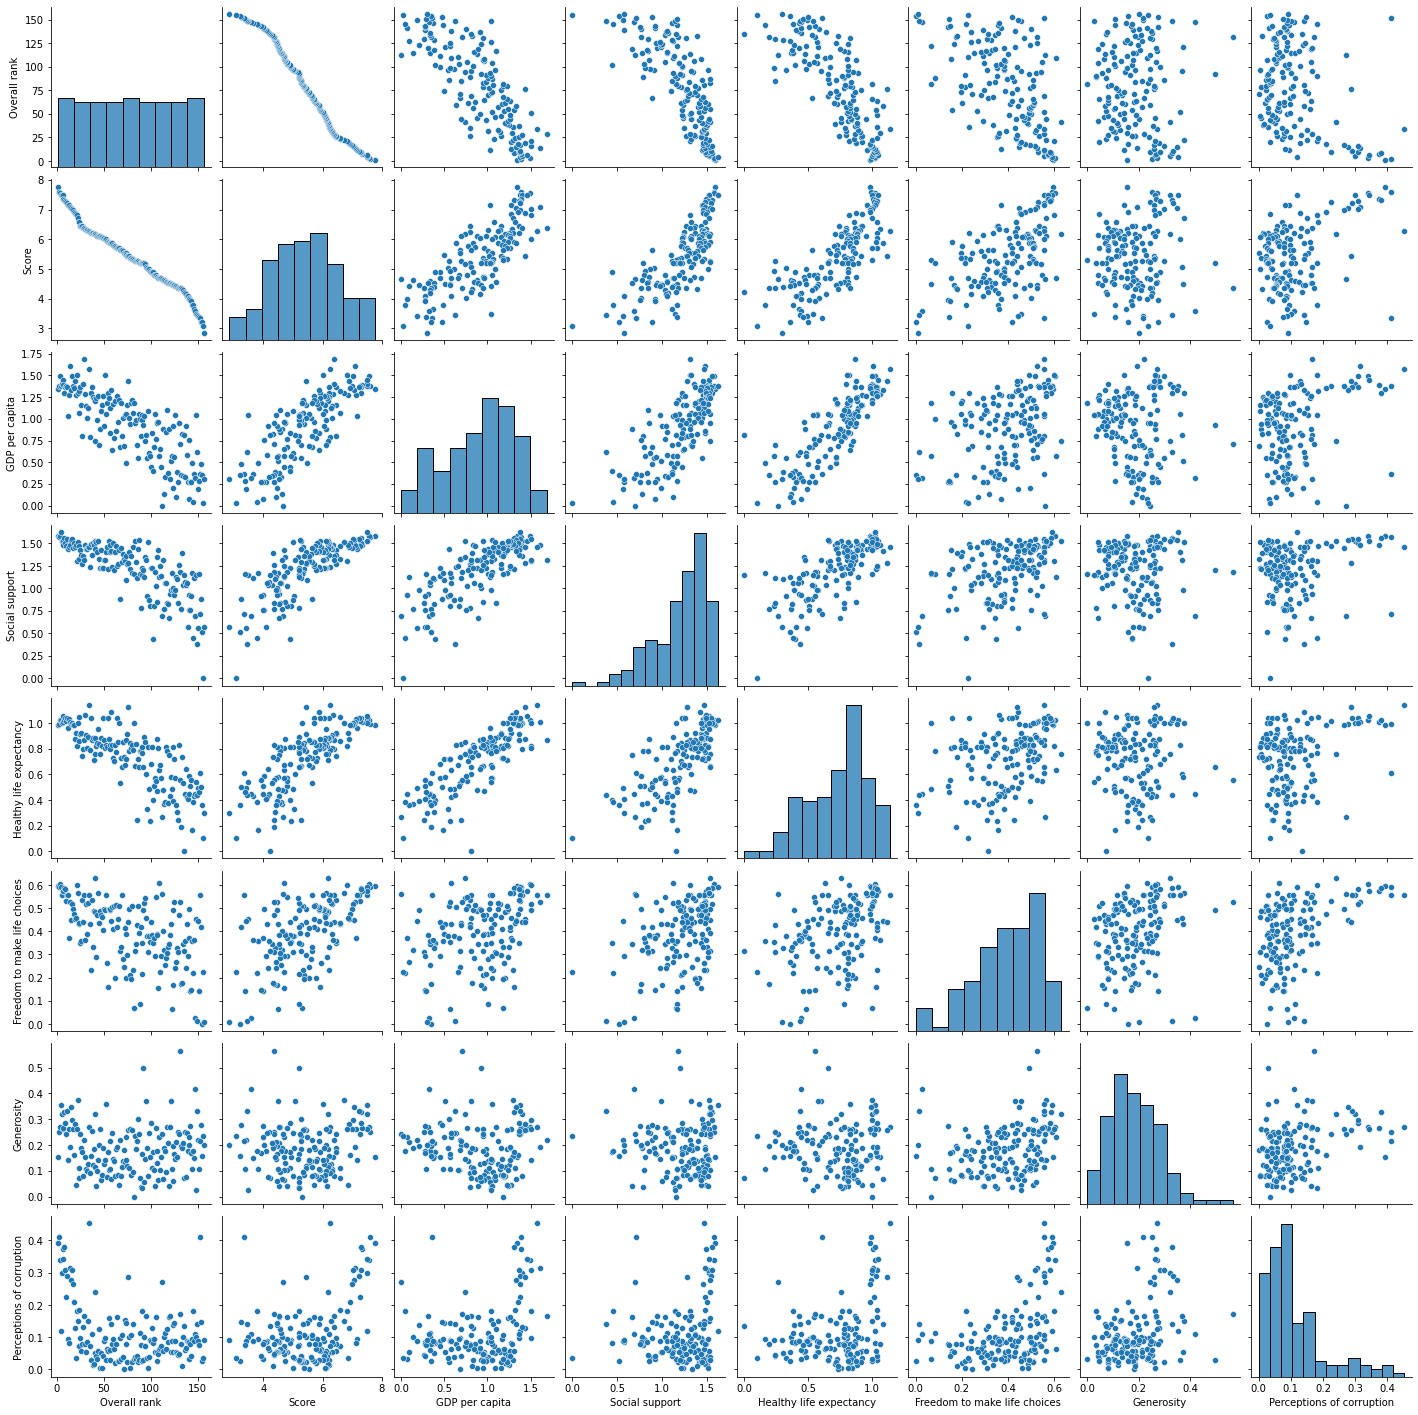

In [63]:
sns.pairplot(life_quality)

<AxesSubplot:>

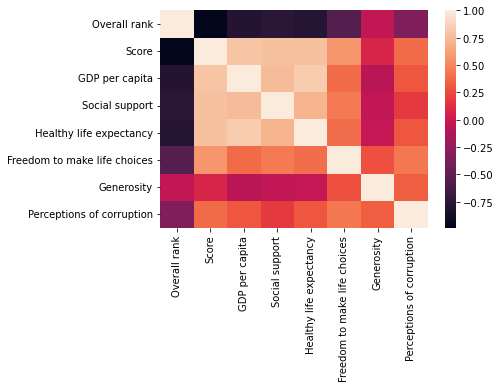

In [64]:
sns.heatmap(life_quality.corr())

Treinamento do Modelo

In [65]:
life_quality.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Determinação dos arrays X e y

In [70]:
X = life_quality[['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

In [71]:
y = life_quality['Score']

In [72]:
X

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411
152,0.476,0.885,0.499,0.417,0.276,0.147
153,0.350,0.517,0.361,0.000,0.158,0.025
154,0.026,0.000,0.105,0.225,0.235,0.035


In [73]:
y

0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64

Divisão dos dados em treino e teste

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Treinamento do modelo de regressão linear

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lm = LinearRegression()

In [78]:
lm.fit(X_train,y_train)

LinearRegression()

Exibe resultado do treino

In [79]:
print(lm.intercept_)

1.7129513007705106


In [80]:
print(lm.coef_)

[0.70659972 1.05300732 1.39203124 1.67482533 0.44060881 0.61310476]


In [81]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

,Coefs
GDP per capita,0.706600
Social support,1.053007
Healthy life expectancy,1.392031
Freedom to make life choices,1.674825
Generosity,0.440609
Perceptions of corruption,0.613105


Predição do score (da qualidade de vida) com base nos parâmetros de entrada

In [82]:
predictions = lm.predict(X_test)

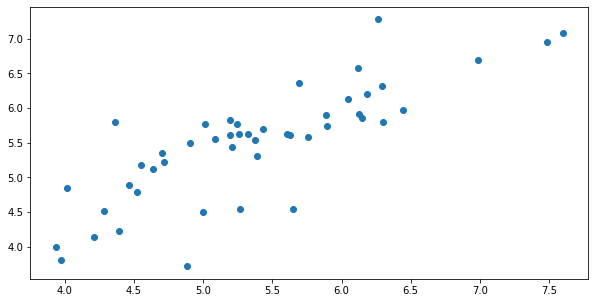

In [84]:
# correlação entre o score real e o previsto
plt.figure(figsize=(10,5))
plt.scatter(y_test,predictions)

<AxesSubplot:xlabel='Score', ylabel='Count'>

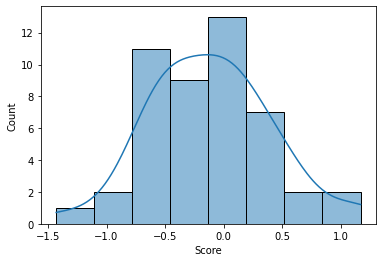

In [87]:
# histograma dos erros (resíduos)
sns.histplot(y_test - predictions, kde=True)

Métricas do modelo

In [88]:
from sklearn import metrics

In [89]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.4183671733633545
MSE: 0.2792135451182457
RMSE: 0.5284066096466297
